In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import glob
from tqdm import tqdm
import warnings;

In [ ]:
face_images = glob.glob('*.jpg')

In [ ]:
from keras.preprocessing import image

In [ ]:
all_images = []

for i in tqdm(face_images):
  img = image.load_img(i, target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255.
  all_images.append(img)

100%|██████████| 1127/1127 [00:02<00:00, 465.37it/s]


In [ ]:
Y =[]
for img in all_images:
  img = image.img_to_array(img)
  Y.append(img)
Y = np.array(Y)
print(Y.shape)

(1127, 256, 256, 3)


In [ ]:
def masked_image(image):
  #mask = np.full((256,256,3), 255, np.uint8)
  for _ in range(np.random.randint(1, 10)):

    x1, x2 = np.random.randint(1, 256), np.random.randint(1, 256)

    y1, y2 = np.random.randint(1, 256), np.random.randint(1, 256)

    thickness = np.random.randint(1, 7)

    masked=cv2.line(image,(x1,y1),(x2,y2),(1,1,1),thickness)
  return masked

In [ ]:
X =[]
for img in all_images:
  img = image.img_to_array(img)
  masked = masked_image(img)
  X.append(masked)  
X = np.array(X)
X = X.reshape(X.shape+(-1,))

(1127, 256, 256, 3)


In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

def build_model():
    input_img = Input(shape=(256, 256, 3))
    l1 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(input_img)
    l2 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))

    l3 = MaxPooling2D(padding='same')(l2)
    #l3 = Dropout(0.3)(l3)
    l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l3)
    l5 = Conv2D(128, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l4)

    l6 = MaxPooling2D(padding='same')(l5)
    l7 = Conv2D(256, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l6)
    l7 = Conv2D(256, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l7)
    
    l8 = UpSampling2D()(l7)

    l9 = Conv2D(128, (3, 3), padding='same', activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(l8)
    l10 = Conv2D(128, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l9)

    l11 = add([l5, l10])
    l12 = UpSampling2D()(l11)
    l13 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l12)
    l14 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))

    l15 = add([l14, l2])

    decoded = Conv2D(3, (3, 3), padding='same', activation='relu', 
                     activity_regularizer=regularizers.l1(10e-10))


    model = Model(input_img, decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
model.fit(X, Y,
          epochs = 18,
          batch_size = 32,
          verbose = 2,
          validation_split=0.15,
          shuffle = True)

Epoch 1/18
30/30 - 163s - loss: 0.0759 - val_loss: 0.0149
Epoch 2/18
30/30 - 86s - loss: 0.0103 - val_loss: 0.0079
Epoch 3/18
30/30 - 86s - loss: 0.0051 - val_loss: 0.0034
Epoch 4/18
30/30 - 86s - loss: 0.0032 - val_loss: 0.0024
Epoch 5/18
30/30 - 86s - loss: 0.0021 - val_loss: 0.0019
Epoch 6/18
30/30 - 86s - loss: 0.0018 - val_loss: 0.0016
Epoch 7/18
30/30 - 86s - loss: 0.0015 - val_loss: 0.0016
Epoch 8/18
30/30 - 86s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/18
30/30 - 86s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/18
30/30 - 86s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/18
30/30 - 86s - loss: 0.0010 - val_loss: 0.0012
Epoch 12/18
30/30 - 86s - loss: 0.0010 - val_loss: 0.0010
Epoch 13/18
30/30 - 86s - loss: 0.0010 - val_loss: 9.9637e-04
Epoch 14/18
30/30 - 86s - loss: 9.1623e-04 - val_loss: 9.1452e-04
Epoch 15/18
30/30 - 86s - loss: 9.4275e-04 - val_loss: 9.4542e-04
Epoch 16/18
30/30 - 86s - loss: 8.5127e-04 - val_loss: 8.4784e-04
Epoch 17/18
30/30 - 86s - loss: 8.2144e-04 - val_los

In [ ]:
model.save("Inpainting-11-5.h5",save_format='h5')

In [ ]:
predictions = model.predict(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


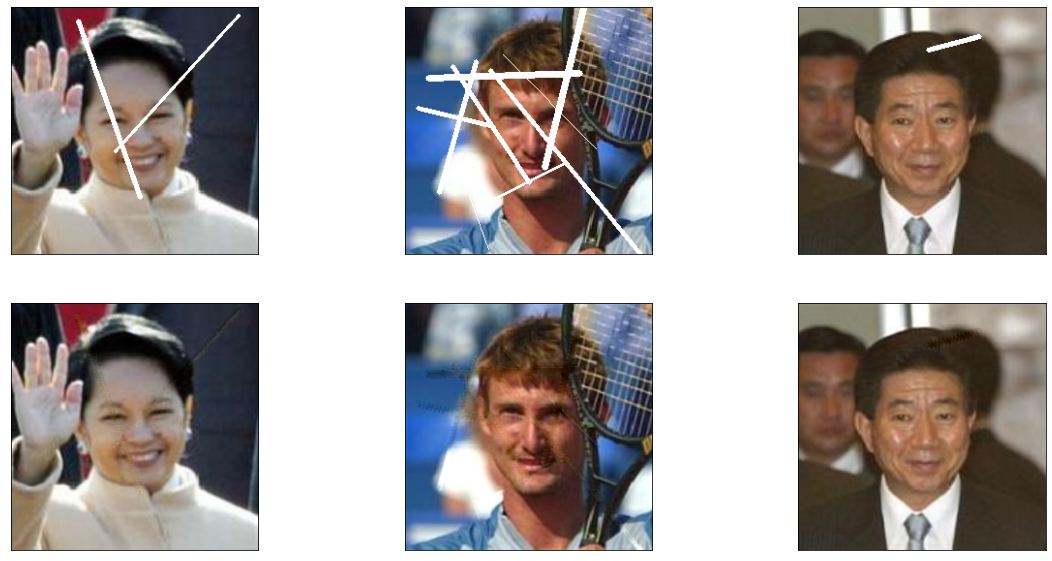

In [ ]:
n = 3
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X[i+5])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+5])
  #save_img(f'{i}.jpg', predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)